In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = sns.load_dataset('iris')

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [34]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [37]:
df.shape

(150, 5)

In [38]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['species'] = le.fit_transform(df['species'])
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [47]:
df['species'].unique()

array([0, 1, 2])

In [50]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [51]:
X = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['species']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [55]:
X_train.shape

(120, 4)

In [57]:
X_test.shape

(30, 4)

In [99]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=2)
# pre-pruning

In [100]:
model = DTC.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

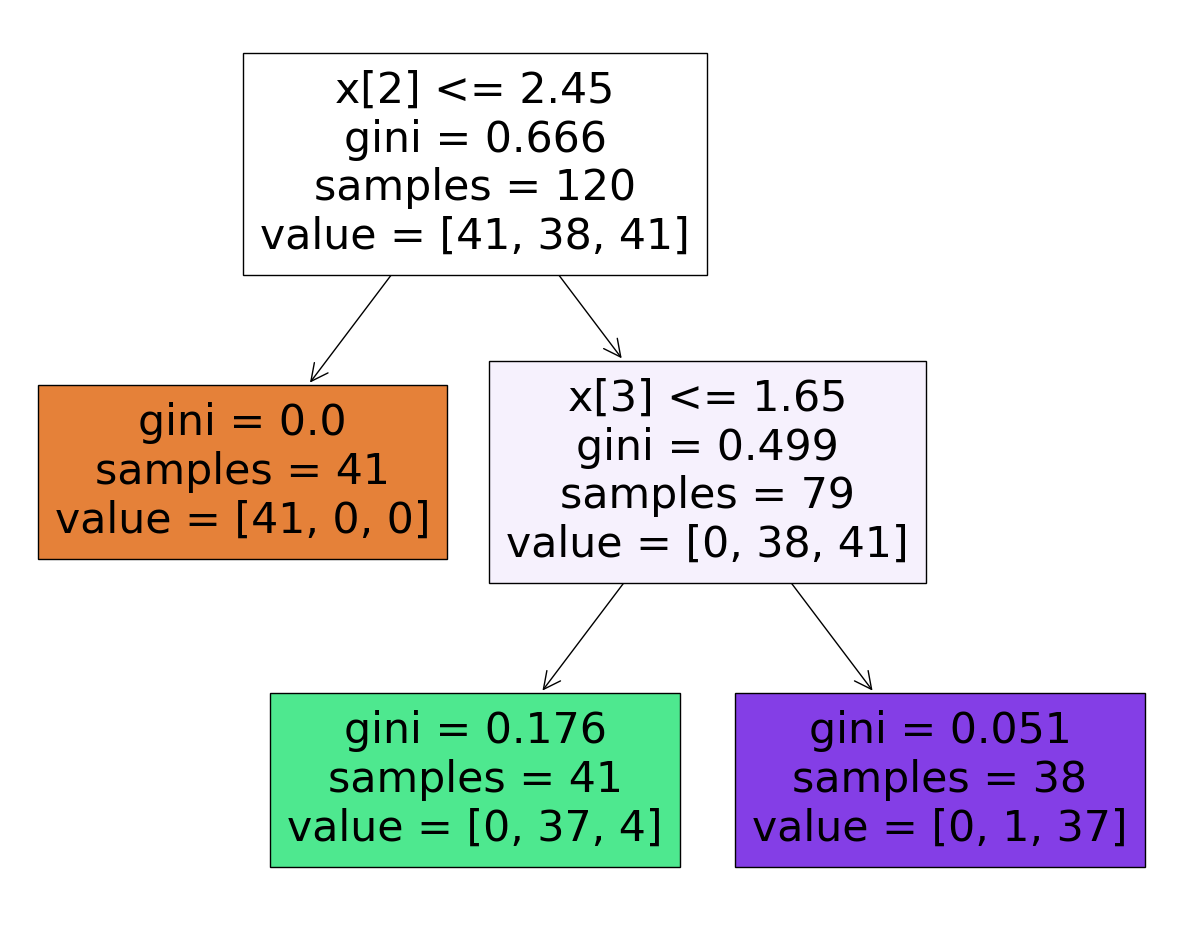

In [101]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(model,filled=True)

In [72]:
y_pred = model.predict(X_test)

In [73]:
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9666666666666667
[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()

In [88]:
params = {
    'criterion' : ['entropy','gini'],
    'max_features' : ['sqrt', 'log2'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5]
}

# 'max_depth' : used as post pruning parameter

In [89]:
gscv = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

In [90]:
gscv_model = gscv.fit(X_train, y_train)
gscv_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [91]:
y_pred1 = gscv_model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

0.9333333333333333
[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [93]:
gscv_model.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [94]:
gscv_model.best_score_

0.9583333333333334

In [95]:
gscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2')